# 퍼셉트론
### 1) h: 활성화 함수(activation func, Heaviside step func)
$$
\hat{y} = h(w^Tx) = \begin{cases} -1, & a < 0 \\
1, & a \ge 0 \end{cases}
$$

### 2) zero-one loss func
$$
L_i(y_i, \hat{y}_i = max(0, -y_i \hat{y}_i)
$$

### 3) perceptron loss func, zero-hinge loss func
$$
L_p(w) = - \sum_{i \in M} y_i \cdot w^Tx_i
$$

예시)

In [224]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx][:, [1, 2]]
seq = map(lambda x : 0 if x > 1 else x, iris.target[idx])
y = np.fromiter(seq, dtype=np.int)

In [154]:
from sklearn.linear_model import Perceptron
def plot_perceptron(n):    
    model = Perceptron(max_iter=n, random_state=1).fit(X, y)

    XX1_min = X[:, 0].min() -1 
    XX1_max = X[:, 0].max() + 1
    XX2_min = X[:, 1].min() -1 
    XX2_max = X[:, 1].max() + 1

    XX, YY = np.meshgrid(np.linspace(XX1_min, XX1_max, 1000),
                        np.linspace(XX2_min, XX2_max, 1000))


    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contour(XX, YY, ZZ, cmap=mpl.cm.Set3)
    # X[y==1, 0]: y==1 idx & X array의 column 1
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolors='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolors='k')
    plt.xlim(XX1_min, XX1_max)
    plt.ylim(XX2_min, XX2_max)
    plt.grid(False)
    plt.show()

    
# from ipywidgets import widgets
# widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=10, step=1, value=1))

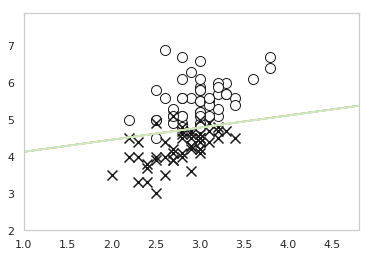

In [155]:
plot_perceptron(1000)

In [156]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(max_iter=100000, eta0=0.1, random_state=99).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[49,  1],
       [ 5, 45]])

#  학습성능
- loss: 틀린 데이터 갯수

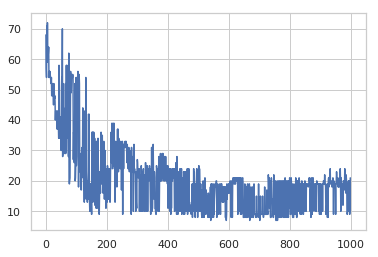

In [157]:
from sklearn.datasets import load_wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

n = 1000
loss = np.empty(n)
model = Perceptron(warm_start=True, random_state=0)
for i in range(n):
    model.fit(X_wine, y_wind)
    # 틀린 것의 갯수
    loss[i] = np.sum(y_wine != model.predict(X_wine))

plt.plot(loss)
plt.show()

# 여러가지 loss func

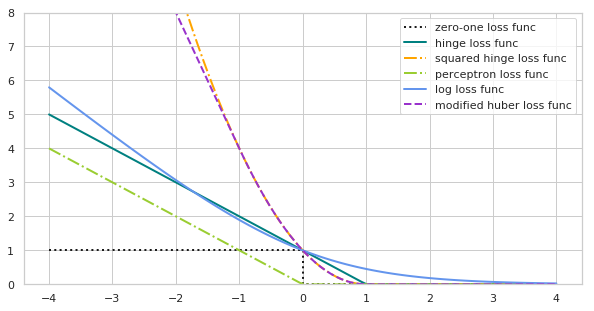

In [220]:
def modifier_huber_loss(y_true, y_pred):
    # 틀리면 z = -1, 맞으면 z = 1 -> vector
    z = y_pred * y_true
    # loss는  맞으면 -4, 틀리면 4 vector
    loss = -4 * z
    # 틀리고 맞은 것 모두 -> 
    loss[z >= -1] = (1 -z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss

plt.figure(figsize=(10, 5))
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='k',
        lw=2, ls=":", label='zero-one loss func')
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal',
        lw=2, ls="-", label='hinge loss func')
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange',
        lw=2, ls='-.', label='squared hinge loss func')
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen',
        lw=2, ls='-.', label='perceptron loss func')
# 왜 +1?
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue',
        lw=2, label='log loss func')
plt.plot(xx, modifier_huber_loss(xx, 1), color='darkorchid',
        lw=2, ls='--', label='modified huber loss func')
plt.ylim(0, 8)

plt.legend()
plt.show()

# Scikit_Learn SGD
- `SGDClassifier` class
    - hinge
    - percetron
    - log
    - huber
    - modified_huber: usual loss func
    - squared_hinge
    

In [264]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n, loss):
    model = SGDClassifier(loss=loss, max_iter=n,
                         random_state=0, warm_start=True).fit(X, y)
    XX1_min = X[:, 0].min() -1 
    XX1_max = X[:, 0].max() + 1
    XX2_min = X[:, 1].min() -1 
    XX2_max = X[:, 1].max() + 1

    XX, YY = np.meshgrid(np.linspace(XX1_min, XX1_max, 1000),
                        np.linspace(XX2_min, XX2_max, 1000))


    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contour(XX, YY, ZZ, cmap=mpl.cm.Set3)
    # X[y==1, 0]: y==1 idx & X array의 column 1
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolors='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolors='k')
    plt.xlim(XX1_min, XX1_max)
    plt.ylim(XX2_min, XX2_max)
    plt.grid(False)
    return model

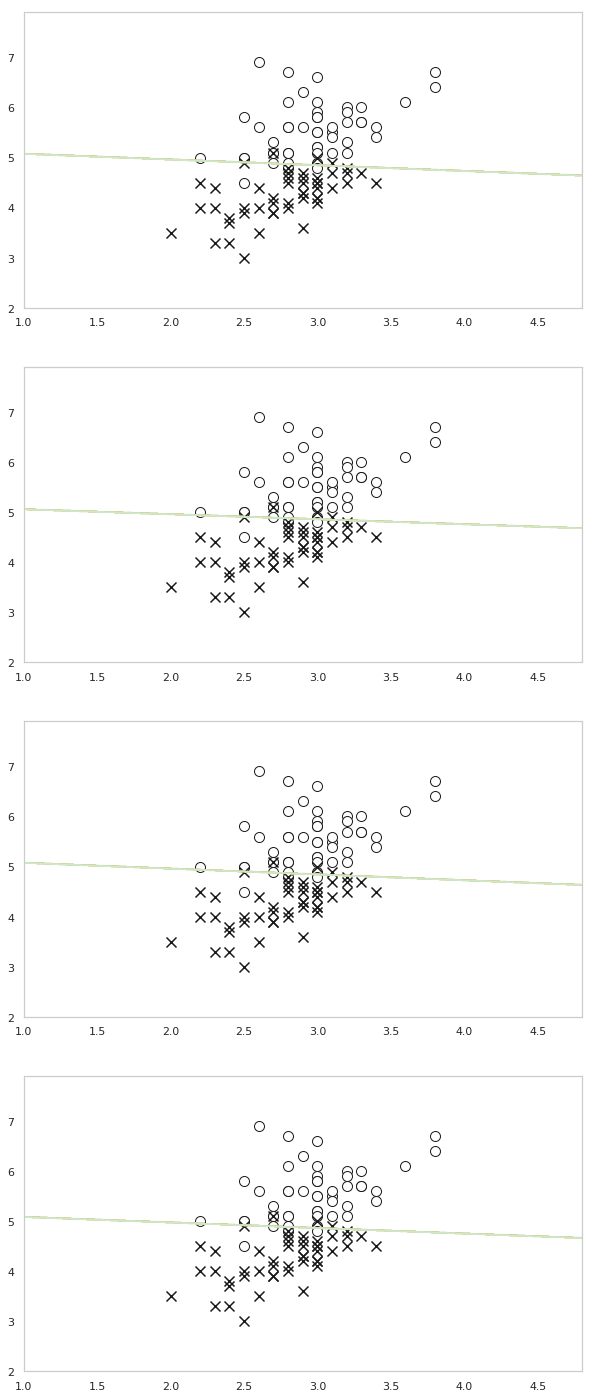

In [265]:
# modified_huber
fig = plt.figure(figsize=(10,25))
fig.add_subplot(411)
mod1 = plot_sgd(1000, 'modified_huber')

fig.add_subplot(412)
mod2 = plot_sgd(1000, 'log')

fig.add_subplot(413)
mod3 = plot_sgd(1000, 'perceptron')

fig.add_subplot(414)
mod4 = plot_sgd(1000, 'squared_hinge')

plt.show()

# loss func 성능비교

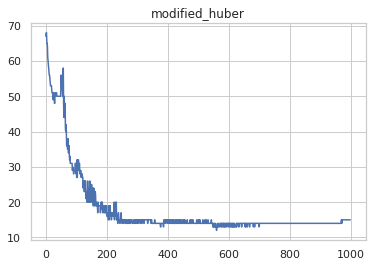

array([[57,  2,  0],
       [10, 59,  2],
       [ 0,  1, 47]])

In [283]:
n = 1000
loss = np.empty(n)
model = SGDClassifier(loss="modified_huber", eta0=2e-6, learning_rate='constant', warm_start=True, random_state=0)
for i in range(n):
    model.fit(X_wine, y_wine)
    loss[i] = np.sum(y_wine != model.predict(X_wine))

plt.plot(loss)
plt.title("modified_huber")
plt.show()
confusion_matrix(y_wine, model.predict(X_wine))

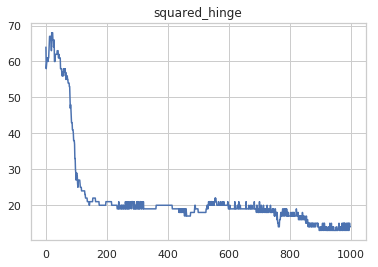

array([[54,  2,  3],
       [ 1, 66,  4],
       [ 0,  4, 44]])

In [284]:
n = 1000
loss = np.empty(n)
model = SGDClassifier(loss="squared_hinge", eta0=2e-6, learning_rate='constant', warm_start=True, random_state=0)
for i in range(n):
    model.fit(X_wine, y_wine)
    loss[i] = np.sum(y_wine != model.predict(X_wine))

plt.plot(loss)
plt.title("squared_hinge")
plt.show()
confusion_matrix(y_wine, model.predict(X_wine))

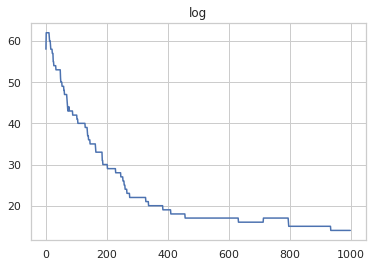

array([[56,  3,  0],
       [ 6, 64,  1],
       [ 1,  3, 44]])

In [285]:
n = 1000
loss = np.empty(n)
model = SGDClassifier(loss="log", eta0=2e-6, learning_rate='constant', warm_start=True, random_state=0)
for i in range(n):
    model.fit(X_wine, y_wine)
    loss[i] = np.sum(y_wine != model.predict(X_wine))

plt.plot(loss)
plt.title("log")
plt.show()
confusion_matrix(y_wine, model.predict(X_wine))

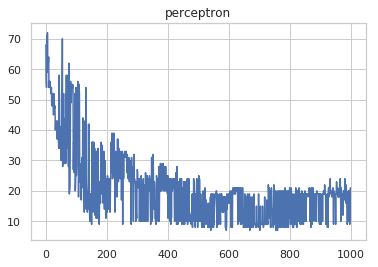

array([[58,  1,  0],
       [15, 54,  2],
       [ 3,  0, 45]])

In [286]:
n = 1000
loss = np.empty(n)
model = SGDClassifier(loss="perceptron", eta0=2e-100, learning_rate='constant', warm_start=True, random_state=0)
for i in range(n):
    model.fit(X_wine, y_wine)
    loss[i] = np.sum(y_wine != model.predict(X_wine))

plt.plot(loss)
plt.title("perceptron")
plt.show()
confusion_matrix(y_wine, model.predict(X_wine))